In [1]:
"""Module to demonstrate hyper-parameter tuning.
Trains model with different combination of hyper-parameters and finds
the one that works best.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

from load_vectorize_data import *
from build_and_train_model import *

FLAGS = None

Using TensorFlow backend.
E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['lyrics'] = df2['lyrics'].apply(lambda y : y.lower())
D:\Softwares\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


D:\Softwares\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                412416    
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_______________________________________________________________

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [14]:
def train_ngram_model_tune(X_train, Y_train, X_test, Y_test):
    input_dim = X_train.shape[1]
    model_bow_1 = Sequential()
    model_bow_1.add(Dense(32, input_dim=input_dim, activation='relu'))
    model_bow_1.add(Dropout(0.5))
    model_bow_1.add(Dense(64, input_dim=input_dim, activation='relu'))
    model_bow_1.add(Dropout(0.5))
    model_bow_1.add(Dense(64, input_dim=input_dim, activation='relu'))
    model_bow_1.add(Dropout(0.5))
    model_bow_1.add(Dense(units=64,activation='relu'))
    model_bow_1.add(Dropout(0.5))
    # activation of output is sigmoid
    model_bow_1.add(Dense(units=1, activation='sigmoid'))
    adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model_bow_1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    model_bow_1.summary()
    
    history_bow = model_bow_1.fit(X_train, 
                                Y_train,
                                epochs=4,
                                verbose=2,
                                validation_data=(X_test, Y_test),
                                batch_size=8)
    score = model_bow_1.evaluate(X_test, Y_test, verbose=3)
    
    # list all data in history
    print(history_bow.history.keys())
    # summarize history for accuracy
    plt.plot(history_bow.history['acc'])
    plt.plot(history_bow.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history_bow.history['loss'])
    plt.plot(history_bow.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    # Save model.
    model_bow_1.save('music_classification_model.h5')
    
    return model_bow_1
    print('Test Loss: ', score[0])
    print('Test Accuracy', score[1])

E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['lyrics'] = df1['lyrics'].apply(lambda x : x.lower())
E:\semester 3\Data Science\Assignments\Assignment 4\Assignment_4_new\load_vectorize_data.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df2['lyrics'] = df2['lyrics'].apply(lambda y : y.lower())
D:\Softwares\Anaconda\Anaconda\lib\site-packages\pandas\core\indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                412416    
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)             

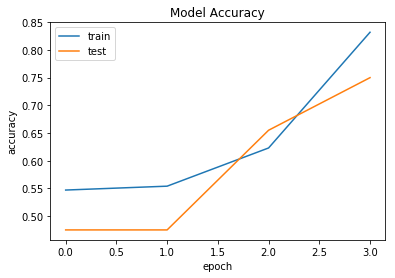

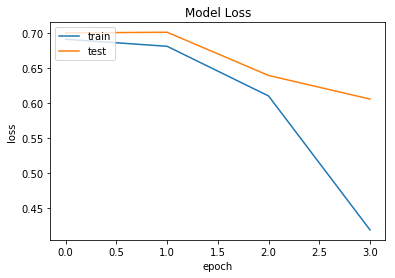

In [15]:
X_train, Y_train, X_test, Y_test = ngram_vectorize_train()
model_bow_1 = train_ngram_model_tune(X_train, Y_train, X_test, Y_test)

In [ ]:
def tune_ngram_model_keras(X_train, Y_train, X_test, Y_test):
    input_dim = X_train.shape[1]
    for units in num_units:
        model_bow = Sequential()
        model_bow.add(Dense(32, input_dim=input_dim, activation='relu'))
        model_bow.add(Dropout(0.5))
        model_bow.add(Dense(units=32,activation='relu'))
        model_bow.add(Dropout(0.5))
    # activation of output is sigmoid
    model_bow.add(Dense(units=1, activation='sigmoid'))
    adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model_bow.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    model_bow.summary()
    
    history_bow = model_bow.fit(X_train, 
                                Y_train,
                                epochs=3,
                                verbose=2,
                                validation_data=(X_test, Y_test),
                                batch_size=10)
    score = model_bow.evaluate(X_test, Y_test, verbose=3)
    
    # list all data in history

In [3]:
def _plot_parameters(params):
    """Creates a 3D surface plot of given parameters.
    # Arguments
        params: dict, contains layers, units and accuracy value combinations.
    """
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(params['layers'],
                    params['units'],
                    params['accuracy'],
                    cmap=cm.coolwarm,
                    antialiased=False)
    plt.show()

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6920 - acc: 0.5530 - val_loss: 0.6882 - val_acc: 0.5900
Epoch 2/12
 - 0s - loss: 0.6855 - acc: 0.6120 - val_loss: 0.6827 - val_acc: 0.5800
Epoch 3/12
 - 0s - loss: 0.6795 - acc: 0.6010 - val_loss: 0.6774 - val_acc: 0.5650
Epoch 4/12
 - 0s - loss: 0.6740 - acc: 0.5910 - val_loss: 0.6722 - val_acc: 0.5500
Epoch 5/12
 - 0s - loss: 0.6685 - acc: 0.5900 - val_loss: 0.6670 - val_acc: 0.5550
Epoch 6/12
 - 0s - loss: 0.6628 - acc: 0.6000 - val_loss: 0.6621 - val_acc: 0.5650
Epoch 7/12
 - 0s - loss: 0.6576 - acc: 0.6010 - val_loss: 0.6573 - val_acc: 0.5700
Epoch 8/12
 - 0s - loss: 0.6526 - acc: 0.6050 - val_loss: 0.6524 - val_acc: 0.5750
Epoch 9/12
 - 0s - loss: 0.6475 - acc: 0.6210 - val_loss: 0.6477 - val_acc: 0.5900
Epoch 10/12
 - 0s - loss: 0.6423 - acc: 0.6310 - val_loss: 0.6431 - val_acc: 0.6100
Epoch 11/12
 - 0s - loss: 0.6375 - acc: 0.6440 - val_loss: 0.6384 - val_acc: 0.6300
Epoch 12/12
 - 0s - loss: 0.6334 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6922 - acc: 0.5370 - val_loss: 0.6879 - val_acc: 0.6000
Epoch 2/12
 - 0s - loss: 0.6858 - acc: 0.6010 - val_loss: 0.6824 - val_acc: 0.5500
Epoch 3/12
 - 0s - loss: 0.6800 - acc: 0.5880 - val_loss: 0.6772 - val_acc: 0.5500
Epoch 4/12
 - 0s - loss: 0.6741 - acc: 0.5950 - val_loss: 0.6721 - val_acc: 0.5600
Epoch 5/12
 - 0s - loss: 0.6684 - acc: 0.5930 - val_loss: 0.6669 - val_acc: 0.5600
Epoch 6/12
 - 0s - loss: 0.6630 - acc: 0.5950 - val_loss: 0.6619 - val_acc: 0.5600
Epoch 7/12
 - 0s - loss: 0.6576 - acc: 0.5980 - val_loss: 0.6570 - val_acc: 0.5600
Epoch 8/12
 - 0s - loss: 0.6526 - acc: 0.6090 - val_loss: 0.6522 - val_acc: 0.5750
Epoch 9/12
 - 1s - loss: 0.6480 - acc: 0.6230 - val_loss: 0.6474 - val_acc: 0.5900
Epoch 10/12
 - 0s - loss: 0.6429 - acc: 0.6320 - val_loss: 0.6429 - val_acc: 0.5900
Epoch 11/12
 - 0s - loss: 0.6379 - acc: 0.6410 - val_loss: 0.6382 - val_acc: 0.6150
Epoch 12/12
 - 0s - loss: 0.6328 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6925 - acc: 0.5400 - val_loss: 0.6888 - val_acc: 0.6900
Epoch 2/12
 - 0s - loss: 0.6859 - acc: 0.6590 - val_loss: 0.6833 - val_acc: 0.6000
Epoch 3/12
 - 0s - loss: 0.6800 - acc: 0.6280 - val_loss: 0.6779 - val_acc: 0.5650
Epoch 4/12
 - 0s - loss: 0.6741 - acc: 0.6020 - val_loss: 0.6726 - val_acc: 0.5550
Epoch 5/12
 - 0s - loss: 0.6688 - acc: 0.5990 - val_loss: 0.6676 - val_acc: 0.5650
Epoch 6/12
 - 0s - loss: 0.6632 - acc: 0.6010 - val_loss: 0.6626 - val_acc: 0.5600
Epoch 7/12
 - 0s - loss: 0.6578 - acc: 0.6080 - val_loss: 0.6577 - val_acc: 0.5650
Epoch 8/12
 - 0s - loss: 0.6529 - acc: 0.6130 - val_loss: 0.6528 - val_acc: 0.5750
Epoch 9/12
 - 0s - loss: 0.6476 - acc: 0.6230 - val_loss: 0.6481 - val_acc: 0.5800
Epoch 10/12
 - 0s - loss: 0.6426 - acc: 0.6380 - val_loss: 0.6433 - val_acc: 0.6000
Epoch 11/12
 - 0s - loss: 0.6376 - acc: 0.6490 - val_loss: 0.6388 - val_acc: 0.6200
Epoch 12/12
 - 0s - loss: 0.6329 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6923 - acc: 0.5380 - val_loss: 0.6880 - val_acc: 0.6100
Epoch 2/12
 - 0s - loss: 0.6857 - acc: 0.6350 - val_loss: 0.6826 - val_acc: 0.5800
Epoch 3/12
 - 0s - loss: 0.6799 - acc: 0.6060 - val_loss: 0.6772 - val_acc: 0.5650
Epoch 4/12
 - 0s - loss: 0.6742 - acc: 0.6000 - val_loss: 0.6720 - val_acc: 0.5650
Epoch 5/12
 - 0s - loss: 0.6683 - acc: 0.6050 - val_loss: 0.6668 - val_acc: 0.5600
Epoch 6/12
 - 0s - loss: 0.6632 - acc: 0.6050 - val_loss: 0.6617 - val_acc: 0.5600
Epoch 7/12
 - 0s - loss: 0.6578 - acc: 0.6120 - val_loss: 0.6568 - val_acc: 0.5700
Epoch 8/12
 - 0s - loss: 0.6528 - acc: 0.6170 - val_loss: 0.6520 - val_acc: 0.5800
Epoch 9/12
 - 0s - loss: 0.6476 - acc: 0.6320 - val_loss: 0.6472 - val_acc: 0.6000
Epoch 10/12
 - 0s - loss: 0.6427 - acc: 0.6500 - val_loss: 0.6426 - val_acc: 0.6250
Epoch 11/12
 - 0s - loss: 0.6378 - acc: 0.6620 - val_loss: 0.6379 - val_acc: 0.6300
Epoch 12/12
 - 0s - loss: 0.6328 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6924 - acc: 0.5400 - val_loss: 0.6880 - val_acc: 0.6750
Epoch 2/12
 - 0s - loss: 0.6859 - acc: 0.6160 - val_loss: 0.6825 - val_acc: 0.5800
Epoch 3/12
 - 0s - loss: 0.6798 - acc: 0.5980 - val_loss: 0.6770 - val_acc: 0.5750
Epoch 4/12
 - 0s - loss: 0.6739 - acc: 0.5920 - val_loss: 0.6719 - val_acc: 0.5750
Epoch 5/12
 - 0s - loss: 0.6685 - acc: 0.6010 - val_loss: 0.6667 - val_acc: 0.5750
Epoch 6/12
 - 0s - loss: 0.6629 - acc: 0.6010 - val_loss: 0.6617 - val_acc: 0.5800
Epoch 7/12
 - 0s - loss: 0.6579 - acc: 0.6040 - val_loss: 0.6568 - val_acc: 0.5800
Epoch 8/12
 - 0s - loss: 0.6527 - acc: 0.6110 - val_loss: 0.6520 - val_acc: 0.5800
Epoch 9/12
 - 0s - loss: 0.6474 - acc: 0.6230 - val_loss: 0.6473 - val_acc: 0.5900
Epoch 10/12
 - 0s - loss: 0.6429 - acc: 0.6240 - val_loss: 0.6426 - val_acc: 0.6050
Epoch 11/12
 - 0s - loss: 0.6378 - acc: 0.6510 - val_loss: 0.6379 - val_acc: 0.6150
Epoch 12/12
 - 0s - loss: 0.6334 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6913 - acc: 0.5480 - val_loss: 0.6849 - val_acc: 0.5700
Epoch 2/12
 - 1s - loss: 0.6791 - acc: 0.5960 - val_loss: 0.6704 - val_acc: 0.6050
Epoch 3/12
 - 0s - loss: 0.6631 - acc: 0.6890 - val_loss: 0.6522 - val_acc: 0.7550
Epoch 4/12
 - 0s - loss: 0.6431 - acc: 0.7920 - val_loss: 0.6312 - val_acc: 0.8450
Epoch 5/12
 - 0s - loss: 0.6222 - acc: 0.8440 - val_loss: 0.6088 - val_acc: 0.9350
Epoch 6/12
 - 0s - loss: 0.6012 - acc: 0.9000 - val_loss: 0.5862 - val_acc: 0.9700
Epoch 7/12
 - 0s - loss: 0.5770 - acc: 0.9260 - val_loss: 0.5638 - val_acc: 0.9800
Epoch 8/12
 - 0s - loss: 0.5549 - acc: 0.9500 - val_loss: 0.5419 - val_acc: 0.9800
Epoch 9/12
 - 0s - loss: 0.5337 - acc: 0.9720 - val_loss: 0.5199 - val_acc: 0.9900
Epoch 10/12
 - 0s - loss: 0.5146 - acc: 0.9700 - val_loss: 0.4981 - val_acc: 0.9900
Epoch 11/12
 - 1s - loss: 0.4939 - acc: 0.9750 - val_loss: 0.4775 - val_acc: 0.9900
Epoch 12/12
 - 1s - loss: 0.4725 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6910 - acc: 0.5540 - val_loss: 0.6821 - val_acc: 0.5150
Epoch 2/12
 - 1s - loss: 0.6751 - acc: 0.5620 - val_loss: 0.6652 - val_acc: 0.5300
Epoch 3/12
 - 1s - loss: 0.6547 - acc: 0.5750 - val_loss: 0.6456 - val_acc: 0.5550
Epoch 4/12
 - 0s - loss: 0.6346 - acc: 0.6350 - val_loss: 0.6235 - val_acc: 0.6200
Epoch 5/12
 - 0s - loss: 0.6103 - acc: 0.7060 - val_loss: 0.6005 - val_acc: 0.7100
Epoch 6/12
 - 1s - loss: 0.5871 - acc: 0.7550 - val_loss: 0.5764 - val_acc: 0.8050
Epoch 7/12
 - 1s - loss: 0.5642 - acc: 0.8300 - val_loss: 0.5523 - val_acc: 0.8750
Epoch 8/12
 - 1s - loss: 0.5394 - acc: 0.8880 - val_loss: 0.5283 - val_acc: 0.9550
Epoch 9/12
 - 0s - loss: 0.5156 - acc: 0.9190 - val_loss: 0.5037 - val_acc: 0.9800
Epoch 10/12
 - 0s - loss: 0.4934 - acc: 0.9440 - val_loss: 0.4805 - val_acc: 0.9750
Epoch 11/12
 - 0s - loss: 0.4731 - acc: 0.9510 - val_loss: 0.4573 - val_acc: 0.9800
Epoch 12/12
 - 1s - loss: 0.4492 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6906 - acc: 0.5510 - val_loss: 0.6782 - val_acc: 0.5350
Epoch 2/12
 - 1s - loss: 0.6680 - acc: 0.6020 - val_loss: 0.6519 - val_acc: 0.6350
Epoch 3/12
 - 1s - loss: 0.6385 - acc: 0.7290 - val_loss: 0.6188 - val_acc: 0.8350
Epoch 4/12
 - 1s - loss: 0.6057 - acc: 0.8780 - val_loss: 0.5815 - val_acc: 0.9500
Epoch 5/12
 - 1s - loss: 0.5668 - acc: 0.9290 - val_loss: 0.5447 - val_acc: 0.9700
Epoch 6/12
 - 1s - loss: 0.5300 - acc: 0.9520 - val_loss: 0.5055 - val_acc: 0.9850
Epoch 7/12
 - 1s - loss: 0.4927 - acc: 0.9720 - val_loss: 0.4673 - val_acc: 0.9850
Epoch 8/12
 - 1s - loss: 0.4564 - acc: 0.9830 - val_loss: 0.4304 - val_acc: 0.9850
Epoch 9/12
 - 1s - loss: 0.4188 - acc: 0.9910 - val_loss: 0.3951 - val_acc: 0.9900
Epoch 10/12
 - 1s - loss: 0.3882 - acc: 0.9960 - val_loss: 0.3631 - val_acc: 0.9950
Epoch 11/12
 - 1s - loss: 0.3540 - acc: 0.9930 - val_loss: 0.3323 - val_acc: 0.9950
Epoch 12/12
 - 1s - loss: 0.3240 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6906 - acc: 0.5700 - val_loss: 0.6779 - val_acc: 0.6700
Epoch 2/12
 - 1s - loss: 0.6681 - acc: 0.6640 - val_loss: 0.6499 - val_acc: 0.7200
Epoch 3/12
 - 1s - loss: 0.6364 - acc: 0.8090 - val_loss: 0.6109 - val_acc: 0.9100
Epoch 4/12
 - 1s - loss: 0.5955 - acc: 0.9350 - val_loss: 0.5651 - val_acc: 0.9650
Epoch 5/12
 - 1s - loss: 0.5477 - acc: 0.9620 - val_loss: 0.5165 - val_acc: 0.9800
Epoch 6/12
 - 1s - loss: 0.5005 - acc: 0.9870 - val_loss: 0.4660 - val_acc: 0.9850
Epoch 7/12
 - 1s - loss: 0.4505 - acc: 0.9900 - val_loss: 0.4174 - val_acc: 0.9900
Epoch 8/12
 - 1s - loss: 0.4021 - acc: 0.9930 - val_loss: 0.3708 - val_acc: 0.9950
Epoch 9/12
 - 1s - loss: 0.3607 - acc: 0.9930 - val_loss: 0.3278 - val_acc: 0.9950
Epoch 10/12
 - 1s - loss: 0.3145 - acc: 0.9960 - val_loss: 0.2876 - val_acc: 0.9950
Epoch 11/12
 - 1s - loss: 0.2801 - acc: 0.9950 - val_loss: 0.2518 - val_acc: 0.9950
Epoch 12/12
 - 1s - loss: 0.2441 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6890 - acc: 0.5580 - val_loss: 0.6666 - val_acc: 0.5450
Epoch 2/12
 - 1s - loss: 0.6499 - acc: 0.5910 - val_loss: 0.6209 - val_acc: 0.6000
Epoch 3/12
 - 1s - loss: 0.5983 - acc: 0.6920 - val_loss: 0.5620 - val_acc: 0.8250
Epoch 4/12
 - 1s - loss: 0.5371 - acc: 0.8830 - val_loss: 0.4951 - val_acc: 0.9750
Epoch 5/12
 - 1s - loss: 0.4715 - acc: 0.9630 - val_loss: 0.4287 - val_acc: 0.9800
Epoch 6/12
 - 1s - loss: 0.4036 - acc: 0.9840 - val_loss: 0.3630 - val_acc: 0.9900
Epoch 7/12
 - 1s - loss: 0.3434 - acc: 0.9900 - val_loss: 0.3039 - val_acc: 0.9950
Epoch 8/12
 - 1s - loss: 0.2878 - acc: 0.9940 - val_loss: 0.2525 - val_acc: 0.9950
Epoch 9/12
 - 1s - loss: 0.2406 - acc: 0.9960 - val_loss: 0.2086 - val_acc: 0.9950
Epoch 10/12
 - 1s - loss: 0.2004 - acc: 0.9970 - val_loss: 0.1730 - val_acc: 0.9950
Epoch 11/12
 - 1s - loss: 0.1649 - acc: 0.9950 - val_loss: 0.1430 - val_acc: 0.9950
Epoch 12/12
 - 1s - loss: 0.1401 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6927 - acc: 0.5390 - val_loss: 0.6906 - val_acc: 0.6050
Epoch 2/12
 - 0s - loss: 0.6889 - acc: 0.6660 - val_loss: 0.6829 - val_acc: 0.8450
Epoch 3/12
 - 0s - loss: 0.6807 - acc: 0.7700 - val_loss: 0.6705 - val_acc: 0.9350
Epoch 4/12
 - 0s - loss: 0.6677 - acc: 0.8410 - val_loss: 0.6537 - val_acc: 0.9600
Epoch 5/12
 - 0s - loss: 0.6518 - acc: 0.8770 - val_loss: 0.6342 - val_acc: 0.9900
Epoch 6/12
 - 0s - loss: 0.6317 - acc: 0.9200 - val_loss: 0.6128 - val_acc: 0.9950
Epoch 7/12
 - 0s - loss: 0.6145 - acc: 0.9080 - val_loss: 0.5894 - val_acc: 0.9950
Epoch 8/12
 - 1s - loss: 0.5912 - acc: 0.9220 - val_loss: 0.5648 - val_acc: 0.9950
Epoch 9/12
 - 1s - loss: 0.5669 - acc: 0.9410 - val_loss: 0.5378 - val_acc: 0.9950
Epoch 10/12
 - 1s - loss: 0.5475 - acc: 0.9300 - val_loss: 0.5109 - val_acc: 0.9950
Epoch 11/12
 - 1s - loss: 0.5188 - acc: 0.9420 - val_loss: 0.4818 - val_acc: 0.9950
Epoch 12/12
 - 1s - loss: 0.4861 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6926 - acc: 0.5260 - val_loss: 0.6909 - val_acc: 0.5150
Epoch 2/12
 - 1s - loss: 0.6887 - acc: 0.5630 - val_loss: 0.6867 - val_acc: 0.5200
Epoch 3/12
 - 1s - loss: 0.6820 - acc: 0.5890 - val_loss: 0.6770 - val_acc: 0.5650
Epoch 4/12
 - 1s - loss: 0.6689 - acc: 0.7000 - val_loss: 0.6542 - val_acc: 0.9000
Epoch 5/12
 - 1s - loss: 0.6479 - acc: 0.8790 - val_loss: 0.6243 - val_acc: 0.9600
Epoch 6/12
 - 0s - loss: 0.6180 - acc: 0.9320 - val_loss: 0.5886 - val_acc: 0.9800
Epoch 7/12
 - 0s - loss: 0.5886 - acc: 0.9410 - val_loss: 0.5492 - val_acc: 0.9850
Epoch 8/12
 - 0s - loss: 0.5477 - acc: 0.9640 - val_loss: 0.5054 - val_acc: 0.9900
Epoch 9/12
 - 1s - loss: 0.5067 - acc: 0.9560 - val_loss: 0.4596 - val_acc: 0.9900
Epoch 10/12
 - 0s - loss: 0.4651 - acc: 0.9720 - val_loss: 0.4140 - val_acc: 0.9950
Epoch 11/12
 - 0s - loss: 0.4223 - acc: 0.9780 - val_loss: 0.3652 - val_acc: 0.9950
Epoch 12/12
 - 0s - loss: 0.3793 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6925 - acc: 0.5150 - val_loss: 0.6893 - val_acc: 0.5200
Epoch 2/12
 - 1s - loss: 0.6852 - acc: 0.5600 - val_loss: 0.6800 - val_acc: 0.5250
Epoch 3/12
 - 1s - loss: 0.6719 - acc: 0.6060 - val_loss: 0.6584 - val_acc: 0.6650
Epoch 4/12
 - 1s - loss: 0.6469 - acc: 0.8090 - val_loss: 0.6238 - val_acc: 0.9350
Epoch 5/12
 - 1s - loss: 0.6123 - acc: 0.9210 - val_loss: 0.5756 - val_acc: 0.9750
Epoch 6/12
 - 1s - loss: 0.5592 - acc: 0.9680 - val_loss: 0.5121 - val_acc: 0.9850
Epoch 7/12
 - 1s - loss: 0.4962 - acc: 0.9700 - val_loss: 0.4341 - val_acc: 0.9950
Epoch 8/12
 - 1s - loss: 0.4225 - acc: 0.9880 - val_loss: 0.3507 - val_acc: 0.9950
Epoch 9/12
 - 1s - loss: 0.3408 - acc: 0.9910 - val_loss: 0.2691 - val_acc: 0.9950
Epoch 10/12
 - 1s - loss: 0.2732 - acc: 0.9920 - val_loss: 0.1973 - val_acc: 0.9950
Epoch 11/12
 - 1s - loss: 0.2046 - acc: 0.9930 - val_loss: 0.1417 - val_acc: 0.9950
Epoch 12/12
 - 1s - loss: 0.1552 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6901 - acc: 0.5600 - val_loss: 0.6817 - val_acc: 0.5150
Epoch 2/12
 - 1s - loss: 0.6706 - acc: 0.5540 - val_loss: 0.6550 - val_acc: 0.5150
Epoch 3/12
 - 1s - loss: 0.6362 - acc: 0.5790 - val_loss: 0.6052 - val_acc: 0.6250
Epoch 4/12
 - 1s - loss: 0.5784 - acc: 0.7630 - val_loss: 0.5276 - val_acc: 0.9000
Epoch 5/12
 - 1s - loss: 0.4976 - acc: 0.8860 - val_loss: 0.4301 - val_acc: 0.9700
Epoch 6/12
 - 1s - loss: 0.3973 - acc: 0.9630 - val_loss: 0.3205 - val_acc: 0.9850
Epoch 7/12
 - 1s - loss: 0.2832 - acc: 0.9870 - val_loss: 0.2181 - val_acc: 0.9950
Epoch 8/12
 - 1s - loss: 0.1909 - acc: 0.9960 - val_loss: 0.1372 - val_acc: 0.9950
Epoch 9/12
 - 1s - loss: 0.1246 - acc: 0.9960 - val_loss: 0.0801 - val_acc: 0.9950
Epoch 10/12
 - 1s - loss: 0.0783 - acc: 0.9990 - val_loss: 0.0477 - val_acc: 1.0000
Epoch 11/12
 - 1s - loss: 0.0519 - acc: 0.9970 - val_loss: 0.0299 - val_acc: 1.0000
Epoch 12/12
 - 1s - loss: 0.0350 - acc

c:\programdata\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1569: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning)


Train on 1000 samples, validate on 200 samples
Epoch 1/12
 - 1s - loss: 0.6888 - acc: 0.5520 - val_loss: 0.6745 - val_acc: 0.5150
Epoch 2/12
 - 1s - loss: 0.6549 - acc: 0.5540 - val_loss: 0.6226 - val_acc: 0.5250
Epoch 3/12
 - 1s - loss: 0.5806 - acc: 0.6290 - val_loss: 0.5122 - val_acc: 0.8300
Epoch 4/12
 - 1s - loss: 0.4607 - acc: 0.8860 - val_loss: 0.3641 - val_acc: 0.9800
Epoch 5/12
 - 1s - loss: 0.3045 - acc: 0.9770 - val_loss: 0.2085 - val_acc: 0.9900
Epoch 6/12
 - 1s - loss: 0.1626 - acc: 0.9970 - val_loss: 0.0933 - val_acc: 0.9950
Epoch 7/12
 - 1s - loss: 0.0708 - acc: 0.9960 - val_loss: 0.0363 - val_acc: 0.9950
Epoch 8/12
 - 1s - loss: 0.0356 - acc: 0.9980 - val_loss: 0.0162 - val_acc: 1.0000
Epoch 9/12
 - 1s - loss: 0.0185 - acc: 0.9980 - val_loss: 0.0084 - val_acc: 1.0000
Epoch 10/12
 - 1s - loss: 0.0151 - acc: 0.9960 - val_loss: 0.0047 - val_acc: 1.0000
Epoch 11/12
 - 1s - loss: 0.0118 - acc: 0.9970 - val_loss: 0.0032 - val_acc: 1.0000
Epoch 12/12
 - 1s - loss: 0.0088 - acc

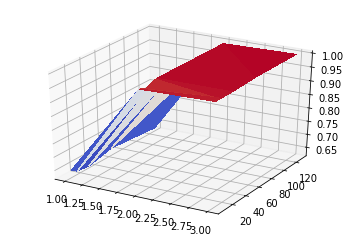

In [7]:
data_raw = load_songs_lyrics_analysis_dataset("./data/train_lyrics_1000.csv", "./data/valid_lyrics_200.csv")
tune_ngram_model(data_raw)